In [7]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import mylib as my
import scipy.ndimage
import pickle
from scipy.stats import norm
import scipy.stats as stats
from scipy.misc import comb

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylandau
from pylandau import langau
import matplotlib.patches as mpatches
from skimage.util import img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage import data, color
from numpy import sqrt, pi, exp, linspace, random
from IPython import display

import matplotlib.mlab as mlab



%matplotlib inline
x_resolution = 2048
y_resolution = 2048
my.set_atlas_style()

In [2]:
dataSelection = 'LABOct2017'

run = 730
file_in_dir=[f for f in os.listdir(cy.file2FullPathCygnus(dataSelection, run, 'SCO')) if not f.startswith('.')] 
print ("# of Scope Files: %d" % (np.size(file_in_dir)))

OSError: [Errno 2] No such file or directory: '/Volumes/DaTa/Cygnus/Data/LABOct2017/Data_Scope/Run730/'

In [4]:
iTr = 1
t, a  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))

IOError: /Volumes/DaTa/Cygnus/Data/LABOct2017/Data_Scope/Run730/C1Run00001.txt not found.

In [8]:
my.set_atlas_style(long)
smoothP = 200

try:
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
except:
    print("Error reading file: %s" % cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
pmt = my.smooth(apmt,smoothP)


xcut   =  3000
xRangeL =  200
xRangeR =  250
yi = min(pmt[xcut:])
yp = min(pmt[:xcut])
xi = np.argmin(pmt[xcut:])+xcut
plt.plot(t, pmt, 'b-', label='PMT', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude PMT [V]')
plt.title("I%d Run%d" % (iTr, run))
plt.vlines(t[xcut], -.05, 0.01, 'y')
plt.vlines(t[xi], -.05, 0.01, 'r')
plt.vlines(t[xi-xRangeL], -.05, 0.01, 'g')
plt.vlines(t[xi+xRangeR], -.05, 0.01, 'g')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
x = t[xi-xRangeL:xi+xRangeR]
y = apmt[xi-xRangeL:xi+xRangeR]

popt,pcov = curve_fit(my.Gauss, x, y, p0=[-0.15, x[xRangeL], 2.0e-5, 0.0], sigma=np.full(np.size(y), 0.1))
print popt
plt.plot(x, my.Gauss(x, *popt), 'r-',
   label='Gauss fit   \nPar_0     = %.2e\nPar_1     = %.2e\nPar_2     = %.2e\nPar_3     = %.2e' %
   (popt[0], popt[1], popt[2], popt[3]))

plt.ylim((-0.200,0.01))
plt.show()
print apmt[xi-xRangeL:xi+xRangeR].sum(), apmt[xcut-xRangeL:xcut+xRangeR].sum(),  np.trapz(apmt[xi-xRangeL:xi+xRangeR]), 


Error reading file: /Volumes/DaTa/Cygnus/Data/LABOct2017/Data_Scope/Run325/C1Run00001.txt


NameError: name 'apmt' is not defined

In [ ]:
xcut   =  3000
xRangeL =  200
xRangeR =  250
intSco411 = []
intSco410 = []
intSco409 = []
run = 411
for iTr in xrange(0, 500):
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
    pmt = my.smooth(apmt,smoothP)
    yi = min(pmt[xcut:])
    yp = min(pmt[:xcut])
    xi = np.argmin(pmt[xcut:])+xcut
    intVal = apmt[xi-xRangeL:xi+xRangeR].sum()
    intSco411.append([intVal])
intSco411=np.array(intSco411)
run = 410
for iTr in xrange(0, 500):
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
    pmt = my.smooth(apmt,smoothP)
    yi = min(pmt[xcut:])
    yp = min(pmt[:xcut])
    xi = np.argmin(pmt[xcut:])+xcut
    intVal = apmt[xi-xRangeL:xi+xRangeR].sum()
    intSco410.append([intVal])
intSco410=np.array(intSco410)
run = 409
for iTr in xrange(0, 500):
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
    pmt = my.smooth(apmt,smoothP)
    yi = min(pmt[xcut:])
    yp = min(pmt[:xcut])
    xi = np.argmin(pmt[xcut:])+xcut
    intVal = apmt[xi-xRangeL:xi+xRangeR].sum()
    intSco409.append([intVal])
intSco409=np.array(intSco409)


In [ ]:
y = -intSco410
bins = y.size
plt.hist(y, bins=bins, color='blue', alpha=1,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
y = -intSco411
bins = y.size
plt.hist(y, bins=bins, color='red', alpha=0.8,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))

y = -intSco409
bins = y.size
plt.hist(y, bins=bins, color='green', alpha=0.5,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
smoothP = 200
xcut   =  3000
xRangeL =  300
xRangeR =  700
dataSelection = 'LABOct2017'
run = 429
debug = False
file_in_dir=np.size([f for f in os.listdir(cy.file2FullPathCygnus(dataSelection, run, 'SCO')) if not f.startswith('.')])
intSco = []
for iTr in xrange(0, file_in_dir):
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
    pmt = my.smooth(apmt,smoothP)
    yi = min(pmt[xcut:])
    yp = min(pmt[:xcut])
    xi = np.argmin(pmt[xcut:])+xcut
    intVal = apmt[xi-xRangeL:xi+xRangeR].sum()
    intSco.append([intVal])
    if iTr/100.0 == int(iTr/100.0):
        print ("Event: %d" % (iTr))
        if debug:
            plt.plot(t, pmt, 'b-', label='PMT', alpha=0.7)
            plt.xlabel('Time [s]')
            plt.ylabel('Amplitude PMT [V]')
            plt.title("I%d Run%d" % (iTr, run))
            plt.vlines(t[xcut], -.05, 0.01, 'y')
            plt.vlines(t[xi], -.05, 0.01, 'r')
            plt.vlines(t[xi-xRangeL], -.05, 0.01, 'g')
            plt.vlines(t[xi+xRangeR], -.05, 0.01, 'g')
            plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            plt.show()
intSco=np.array(intSco)
print ("ENDED")

In [ ]:


my.set_atlas_style()
mysize = 0

y       = -intSco
#y=y[(y>0) & (y<50)]
fit = True
bins = y.size
plt.hist(y, bins=bins, color='darkred', alpha=0.6,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.xlim((0, 300))
if fit:
    cmin    = 13
    cmax    = 100
    
    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
    yh, _ = np.histogram(y, binf, range=(cmin,cmax))
    print bins, binf
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
    plt.errorbar(x, yh, ye, fmt="k.")
    xf = np.linspace(cmin, cmax, 100)
    A, M, S = yh.max(), y.mean(), y.std()
    popt, pcov = curve_fit(my.TwoExp, x, yh, 
                          sigma=ye,
                          absolute_sigma=True,
                          p0=(A, 1, A, 2))
    chi = chisquare(yh, f_exp=my.TwoExp(x, *popt))
    plt.plot(xf, my.TwoExp(xf, *popt), 'b-', label=(('P0 = %.2e\nP1 = %.2e\nP2 = %.2e\nP3 = %.2e\n'+r'$\chi^2$ = %.2e') % 
                  (popt[0], popt[1], popt[2], popt[3], chi[0])))

#    popt, pcov = curve_fit(my.Exp, x, yh, 
#                          sigma=ye,
#                          absolute_sigma=True,
#                          p0=(A, 1, 0))
#    plt.plot(xf, my.Exp(xf, *popt), 'y-', label='P0 = %.2e\nP1 = %.2e\nP2 = %.2e' % 
#                  (popt[0], popt[1], popt[2]))

#    cmin    = 10
#    cmax    = 27
#    yh = yh[(x>cmin) & (x<cmax)]
#    ye = ye[(x>cmin) & (x<cmax)]
#    x = x[(x>cmin) & (x<cmax)]
#    popt, pcov = curve_fit(my.Gauss3, x, yh, 
#                          sigma=ye,
#                          absolute_sigma=True,
#                          p0=(A, M, S))
#    xf = np.linspace(cmin, cmax, 100)
#    plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
#                  (popt[0], popt[1], popt[2]))

plt.xlim((0, 100))
plt.legend()
plt.show()

In [472]:
reload(my)

<module 'mylib' from 'mylib.py'>

# of Image Files: 100
[ 7.9  3.9  3.9  3.9  3.9  3.9  3.8  3.8] [238 242 204 104 231 251  91 175] [136 221 195  33  90 118 194 156]


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


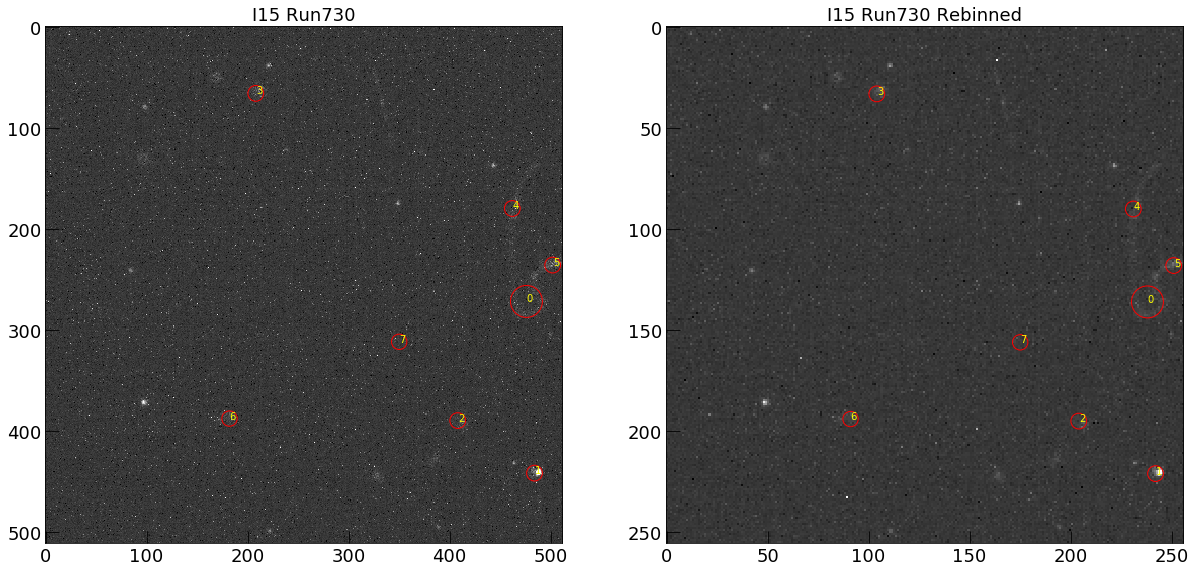

15, 0, 8, 15.8, luce: 185925.00, bck 183367.15, diff: 2557.85 26014144.00


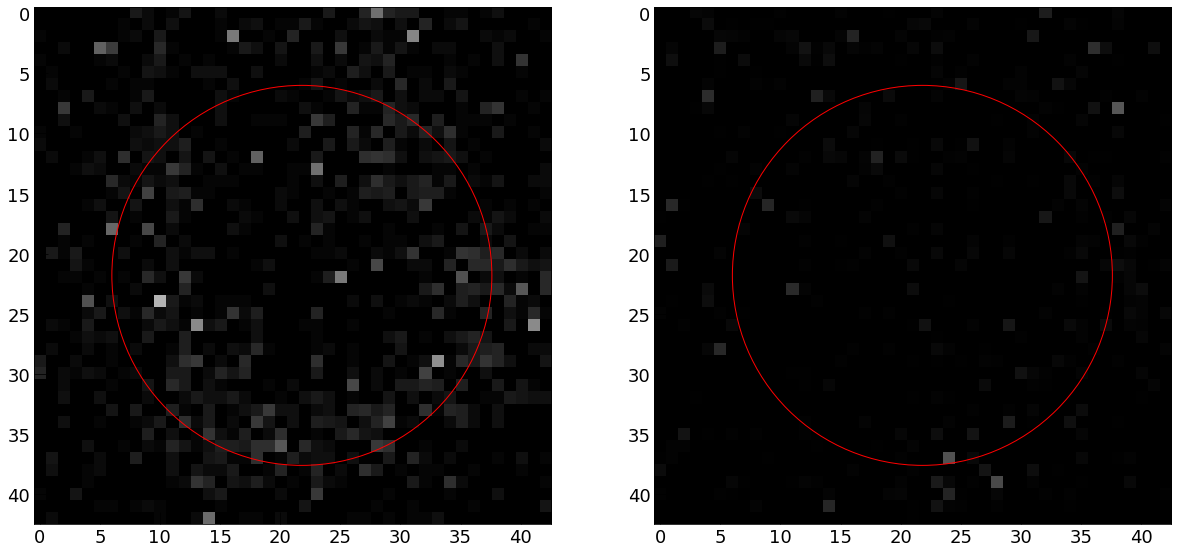

15, 1, 8, 7.8, luce: 76456.00, bck 76393.07, diff: 62.93 26014144.00


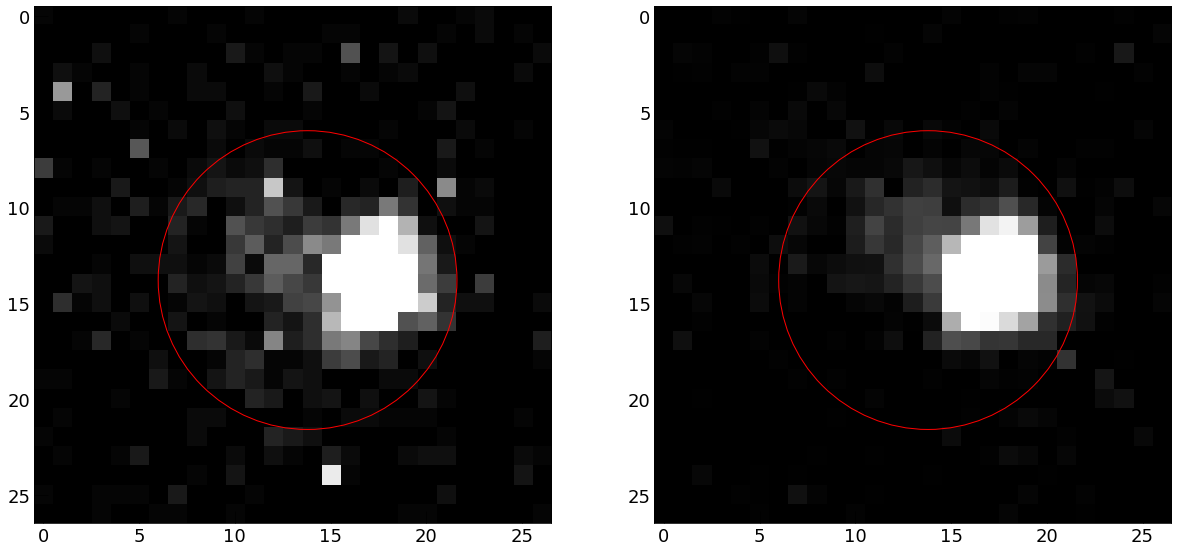

15, 2, 8, 7.8, luce: 73075.00, bck 72225.40, diff: 849.60 26014144.00


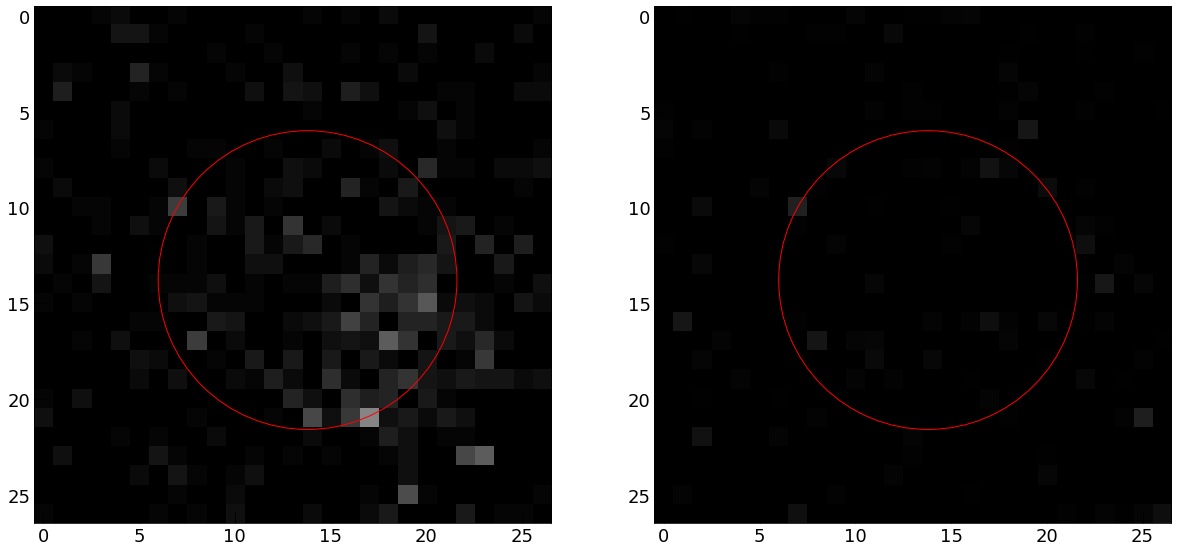

15, 3, 8, 7.8, luce: 73331.00, bck 72424.87, diff: 906.13 26014144.00


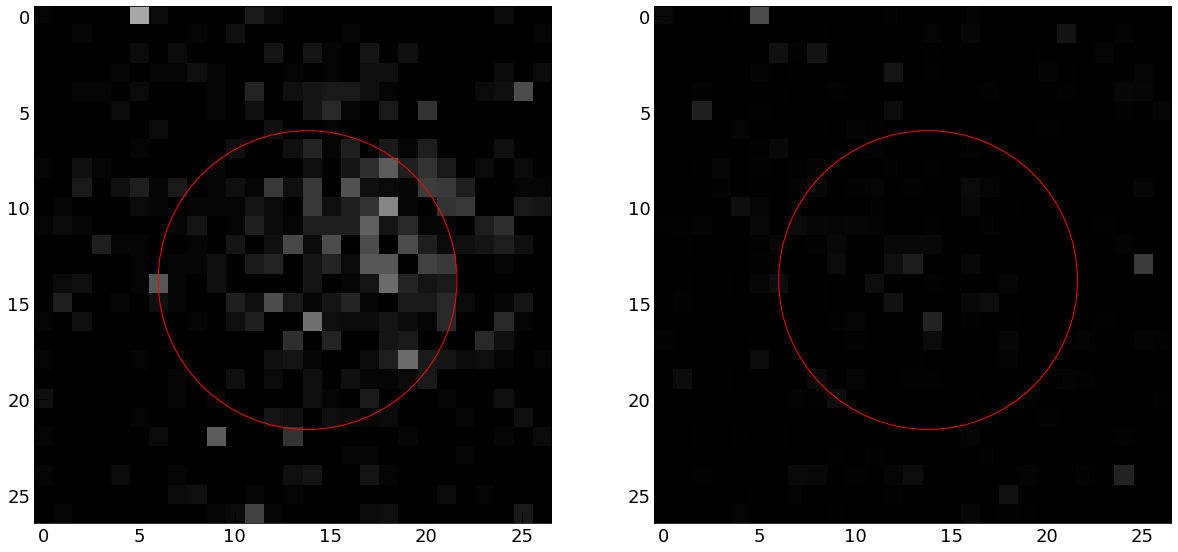

15, 4, 8, 7.8, luce: 73211.00, bck 72268.95, diff: 942.05 26014144.00


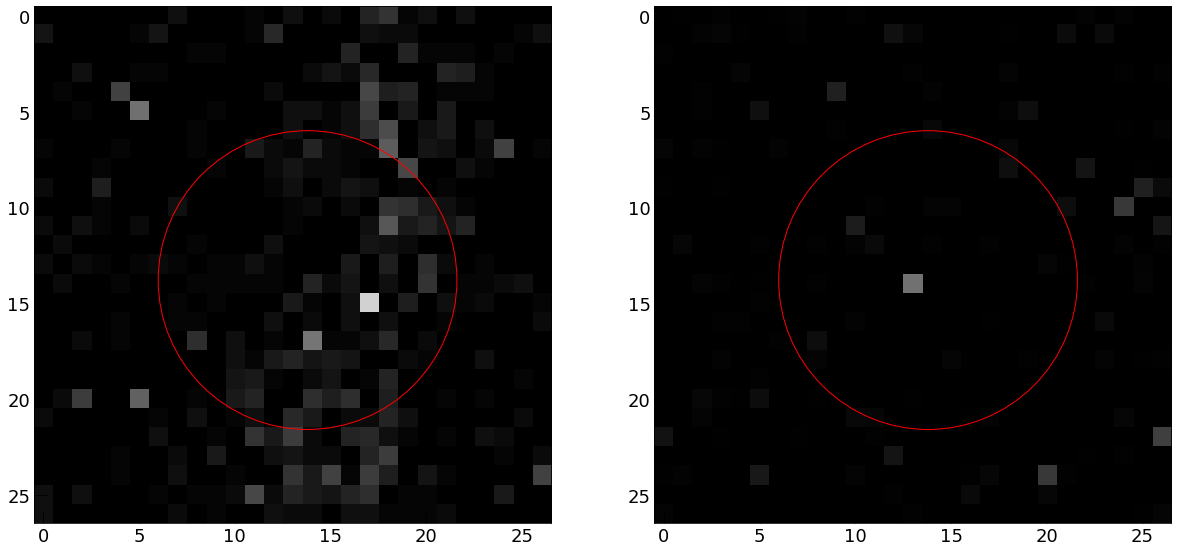

15, 5, 8, 7.8, luce: 65848.00, bck 64204.13, diff: 1643.87 26014144.00


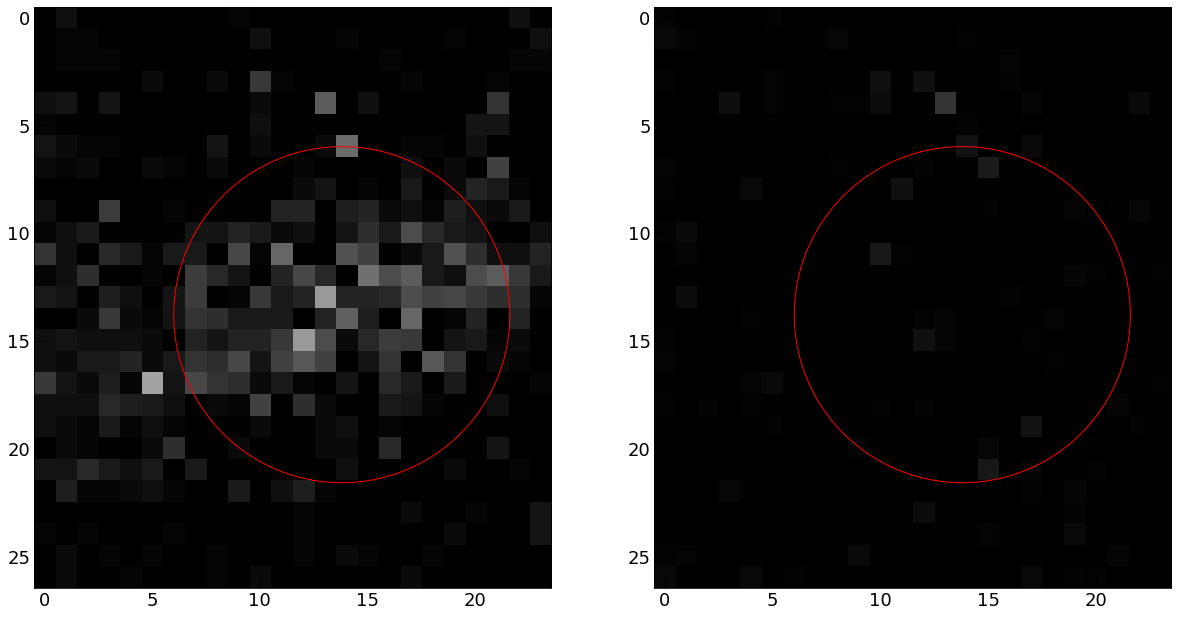

15, 6, 8, 7.6, luce: 72860.00, bck 72315.96, diff: 544.04 26014144.00


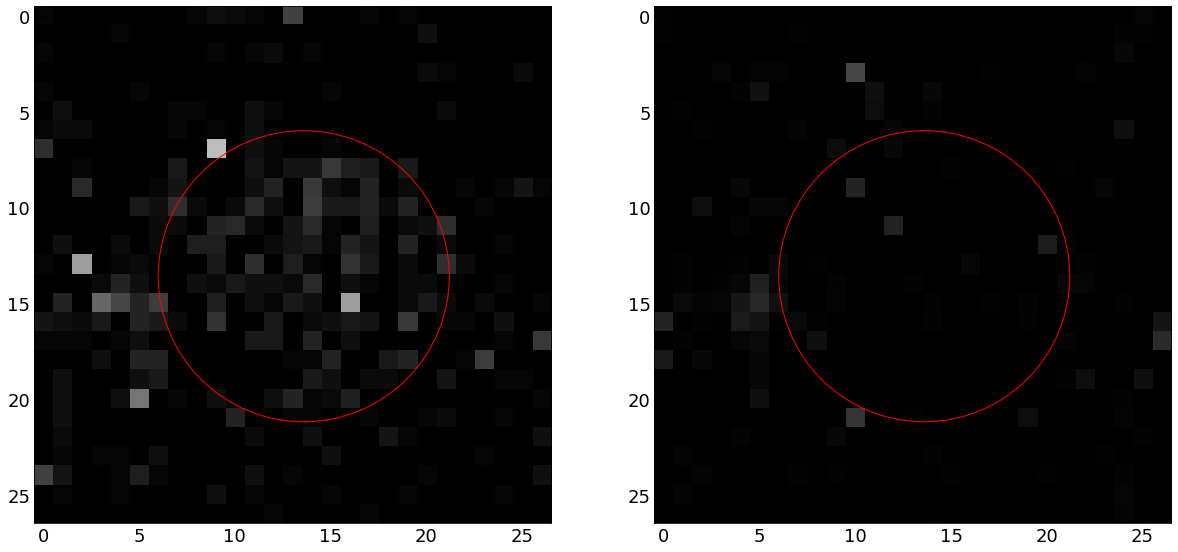

15, 7, 8, 7.6, luce: 72561.00, bck 72372.95, diff: 188.05 26014144.00


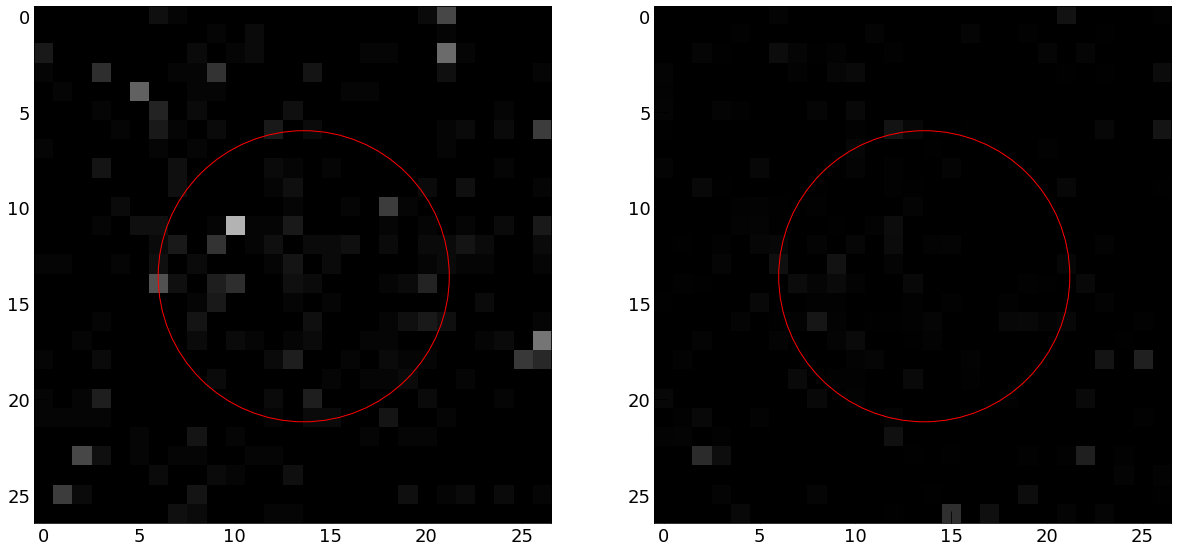

None

In [3]:
my.set_atlas_style('large')
dataSelection = 'LABOct2017'
runI = 730
max_image=np.size([f for f in os.listdir(cy.file2FullPathCygnus(dataSelection, runI, 'H5')) if not f.startswith('.')])
print ("# of Image Files: %d" % (max_image))
debug = True
rescale = 256
# Usa la prima imagine cone BCK e non la usa per l'analisi
N = 10.0
iTr = 15
img_save = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, iTr-1)) 
if N>1:
    for i in range(int(iTr-N), int(iTr-1)):
        dataImage = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, i))
        img_save = np.copy((dataImage+(N-1)*img_save)/N)
scale=(dataImage.shape[1]/rescale)
# Talglio!
img_save  = img_save[862:1374, 1200:1712]
while True:
    try:

        dataImage = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, iTr)) 
        # Talglio!
        dataImage = dataImage[862:1374, 1200:1712]
        #
        scale=(dataImage.shape[1]/rescale)
        imgRes = my.rebin(dataImage, (rescale, rescale))
    
        edges = (imgRes>101) & (imgRes<150) #soglia del contenuto dei pixel

        
        hough_radii = np.arange(3, 10, 0.1)
        hough_res = hough_circle(edges, hough_radii)
    
        accums, cxh, cyh, radii = hough_circle_peaks(hough_res, hough_radii, 
                                                     min_xdistance=5, 
                                                     min_ydistance=5,
                                                     total_num_peaks=80)
        
        imax  = np.argmax(radii)
        xg    = np.array([cxh[imax]])
        yg    = np.array([cyh[imax]])
        rg    = np.array([radii[imax]])
        cxh   = np.delete(cxh, imax)
        cyh   = np.delete(cyh, imax)
        radii = np.delete(radii, imax)
        
        dr    = 3.0
        ig    = 0
        while True:
            imax  = np.argmax(radii)
            idel  = np.array([])
            for k in xrange(0, rg.size):
                if ((cxh[imax]-xg[k])**2+(cyh[imax]-yg[k])**2) < (rg[k]+dr)**2:
                    idel = np.append(idel,  imax)
            for j in xrange(0, np.size(idel)):
                cxh   = np.delete(cxh,   idel[j])
                cyh   = np.delete(cyh,   idel[j])
                radii = np.delete(radii, idel[j]) 
            if np.size(idel) == 0:
                    xg    = np.append(xg,   cxh[imax])
                    yg    = np.append(yg,   cyh[imax])
                    rg    = np.append(rg,   radii[imax])
            if radii.size==0:
                break
        
        
        print rg, xg, yg
        fig, ax = plt.subplots(1,2)
        ax[0].set_title("I%d Run%d" % (iTr, runI))
        ax[0].imshow(dataImage, cmap="gray", vmin=85,vmax=150)
        ax[1].set_title("I%d Run%d Rebinned" % (iTr, runI))
        ax[1].imshow(imgRes, cmap="gray", vmin=85,vmax=150)
        for j in xrange(0, rg.size):
            
            axa = plt.Circle((xg[j]*scale, yg[j]*scale), (rg[j])*scale, color='r', fill=False)
            ax[0].add_artist(axa)
            ax[0].annotate(j, (xg[j]*scale,yg[j]*scale), color='yellow')
            
            axb = plt.Circle((xg[j], yg[j]), (rg[j]), color='r', fill=False)
            ax[1].add_artist(axb)
            ax[1].annotate(j, (xg[j],yg[j]), color='yellow')
        
        plt.show()

        for j in xrange(0, rg.size):
            imgG = np.copy(dataImage[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                                     int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)])
            imgB = np.copy(img_save[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                                    int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)])
            imgC = imgG - imgB
        
            print ('%d, %d, %d, %.1f, luce: %.2f, bck %.2f, diff: %.2f %.2f' % 
                       (iTr, j, rg.size, rg[j]*scale, imgG.sum(), imgB.sum(), imgC.sum(), dataImage.sum()))
            dd = np.copy(dataImage)
            bb = np.copy(img_save)
            dd = dd[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
               int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)]
            bb = bb[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
               int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)]
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(dd,cmap="gray",  vmin=100,vmax=150)
            axa = plt.Circle(((rg[j]+dr)*scale, (rg[j]+dr)*scale), (rg[j])*scale, color='r', fill=False)
            ax[0].add_artist(axa)
            ax[1].imshow(bb,cmap="gray",  vmin=100,vmax=150)
            axb = plt.Circle(((rg[j]+dr)*scale, (rg[j]+dr)*scale), (rg[j])*scale, color='r', fill=False)
            ax[1].add_artist(axb)
            plt.show()
        
        display.display(plt.show())
        display.clear_output(wait=True)
    
        if iTr == max_image-1:
                break
        iTr+=1
        img_save = np.copy(dataImage)
        raw_input('Press <ret> to continue -> ')
    except KeyboardInterrupt:
        break
    



# of Image Files: 100


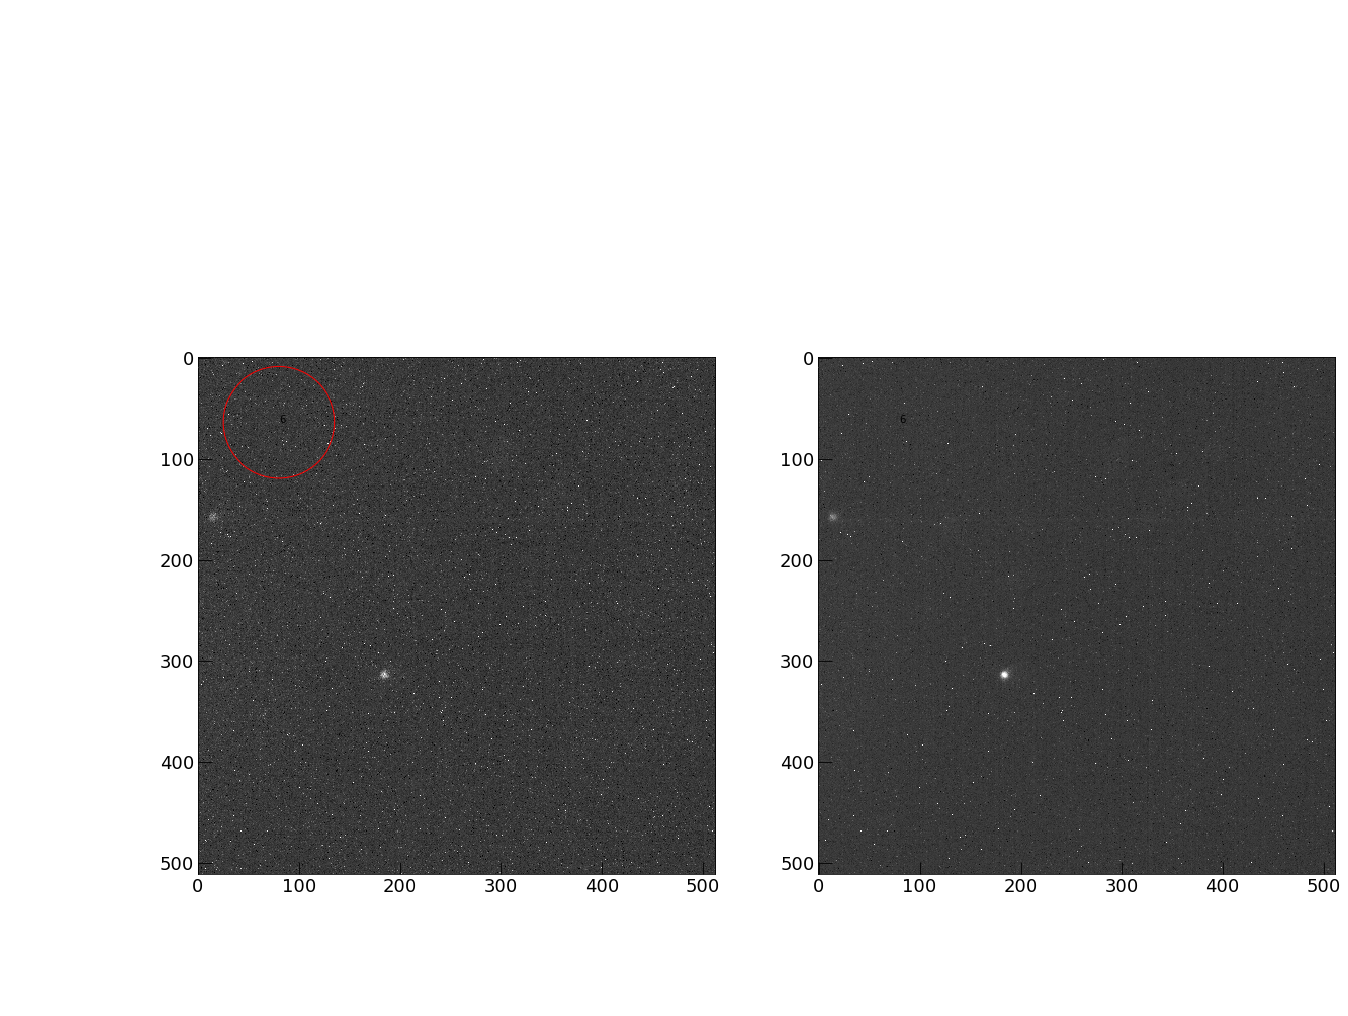

Traccia: 10, spot 12 99.7165 99.6716


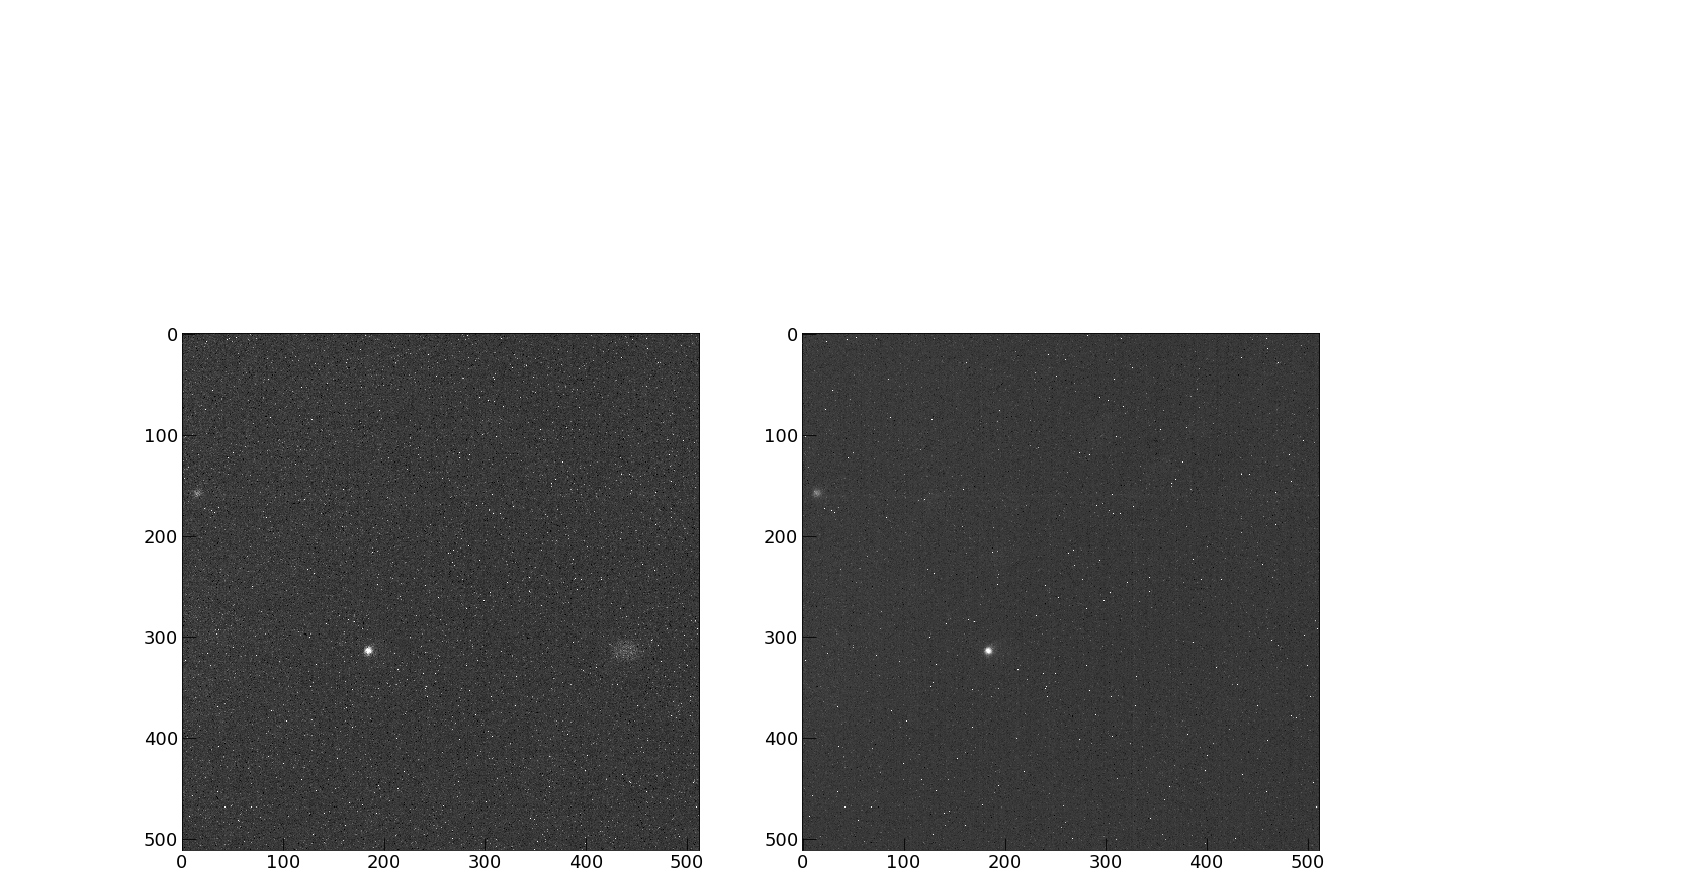

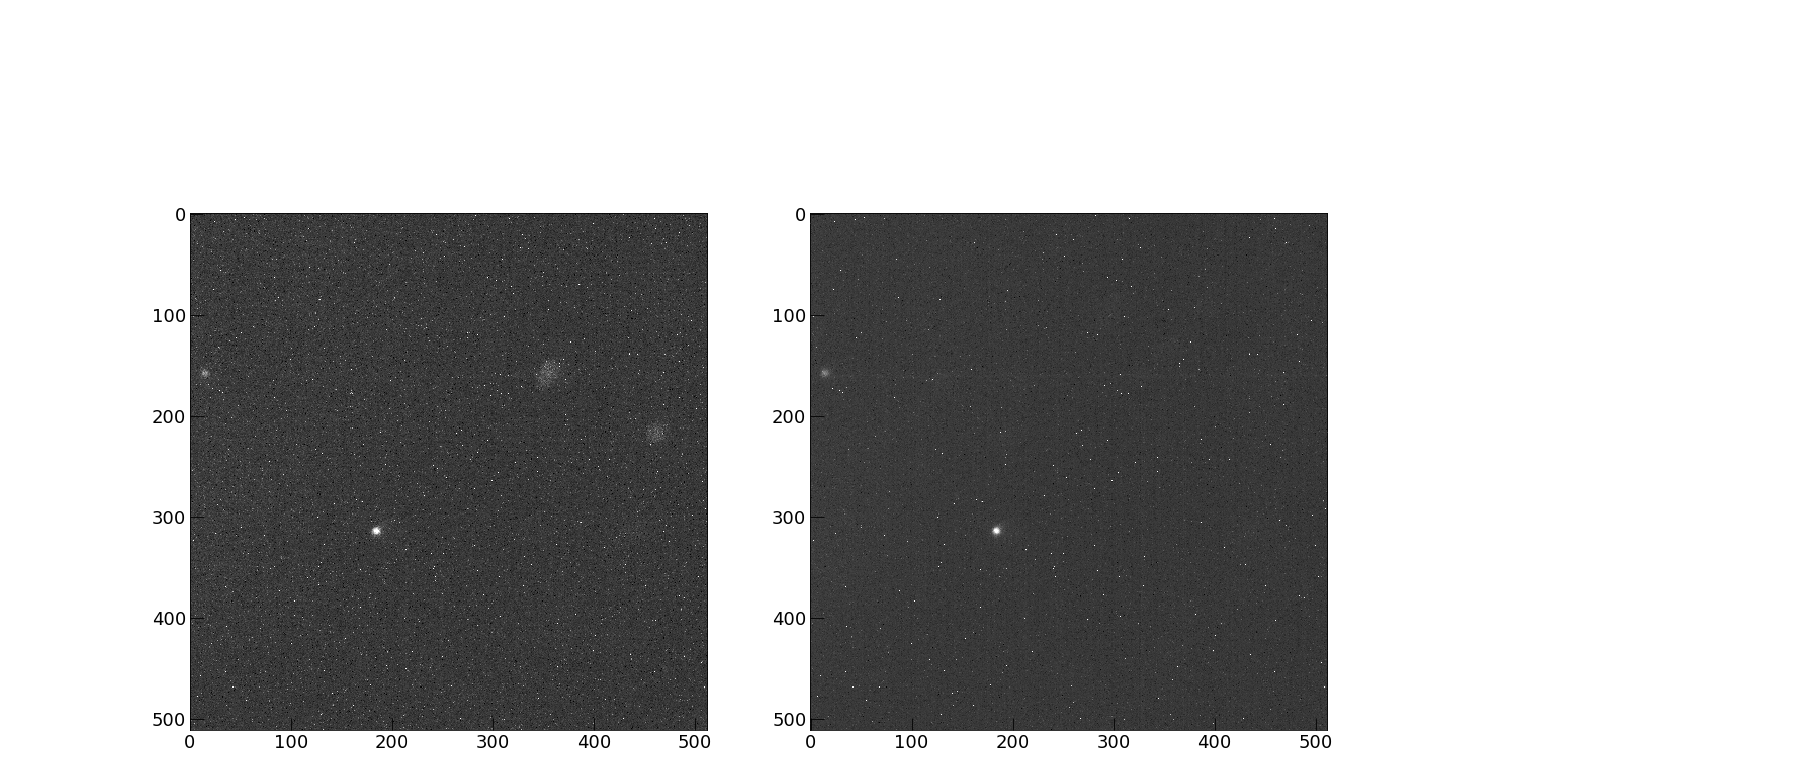

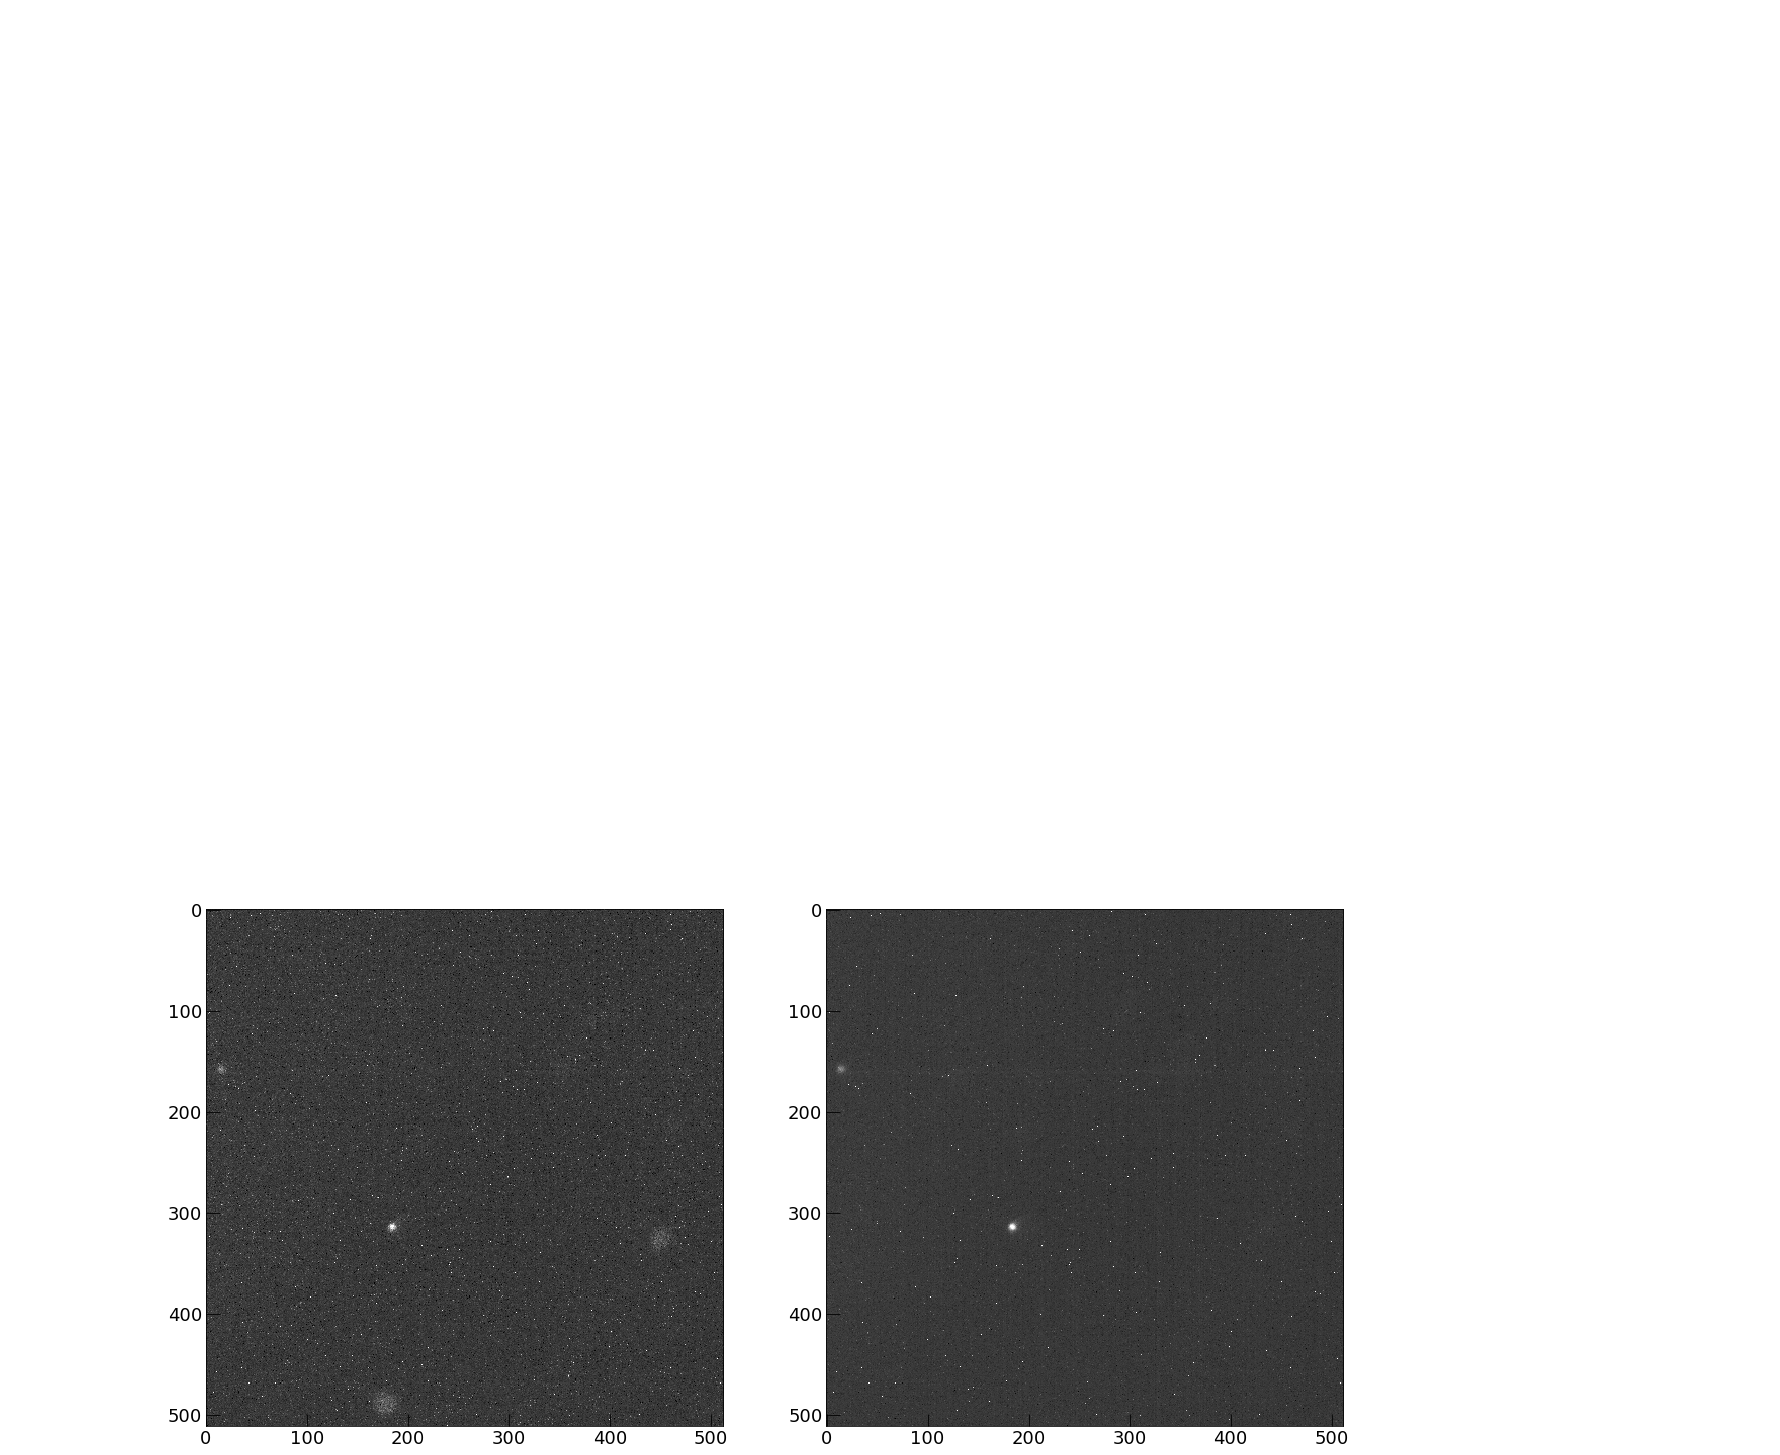

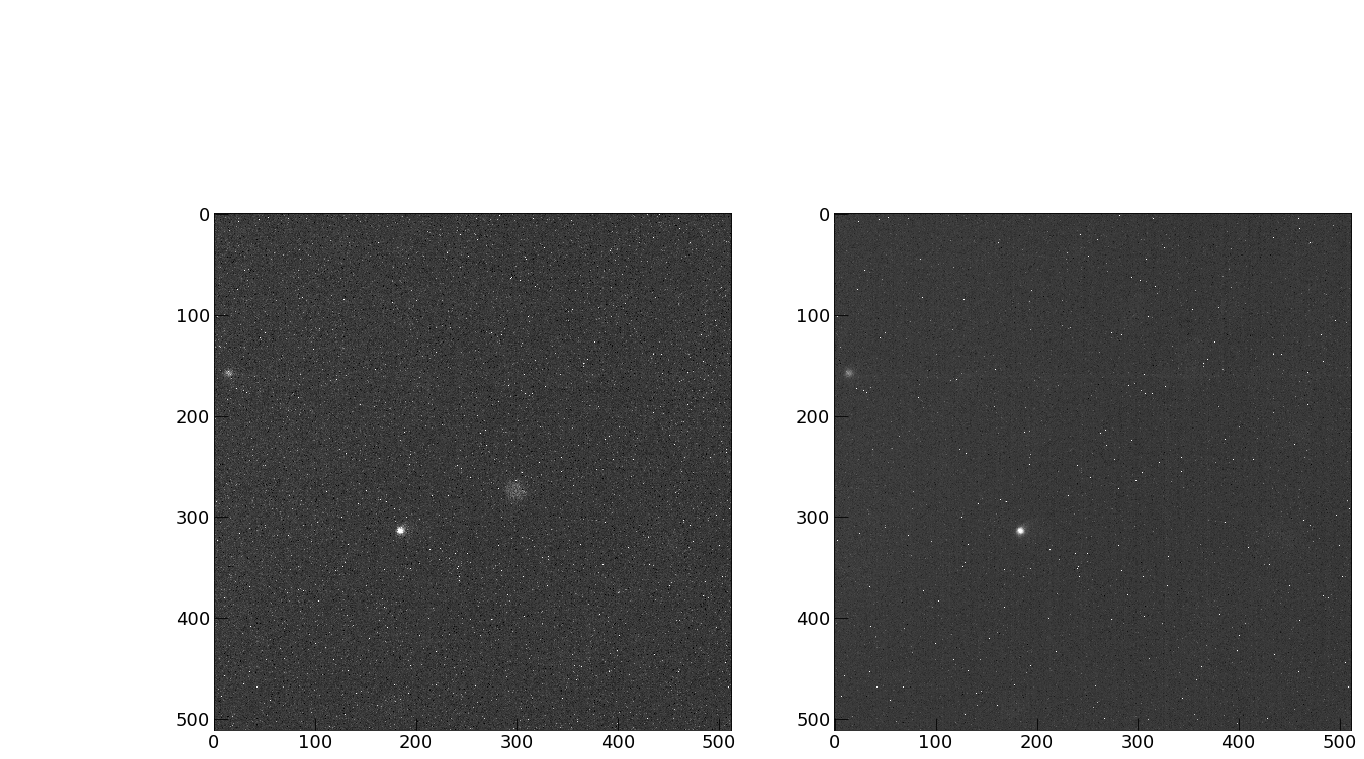

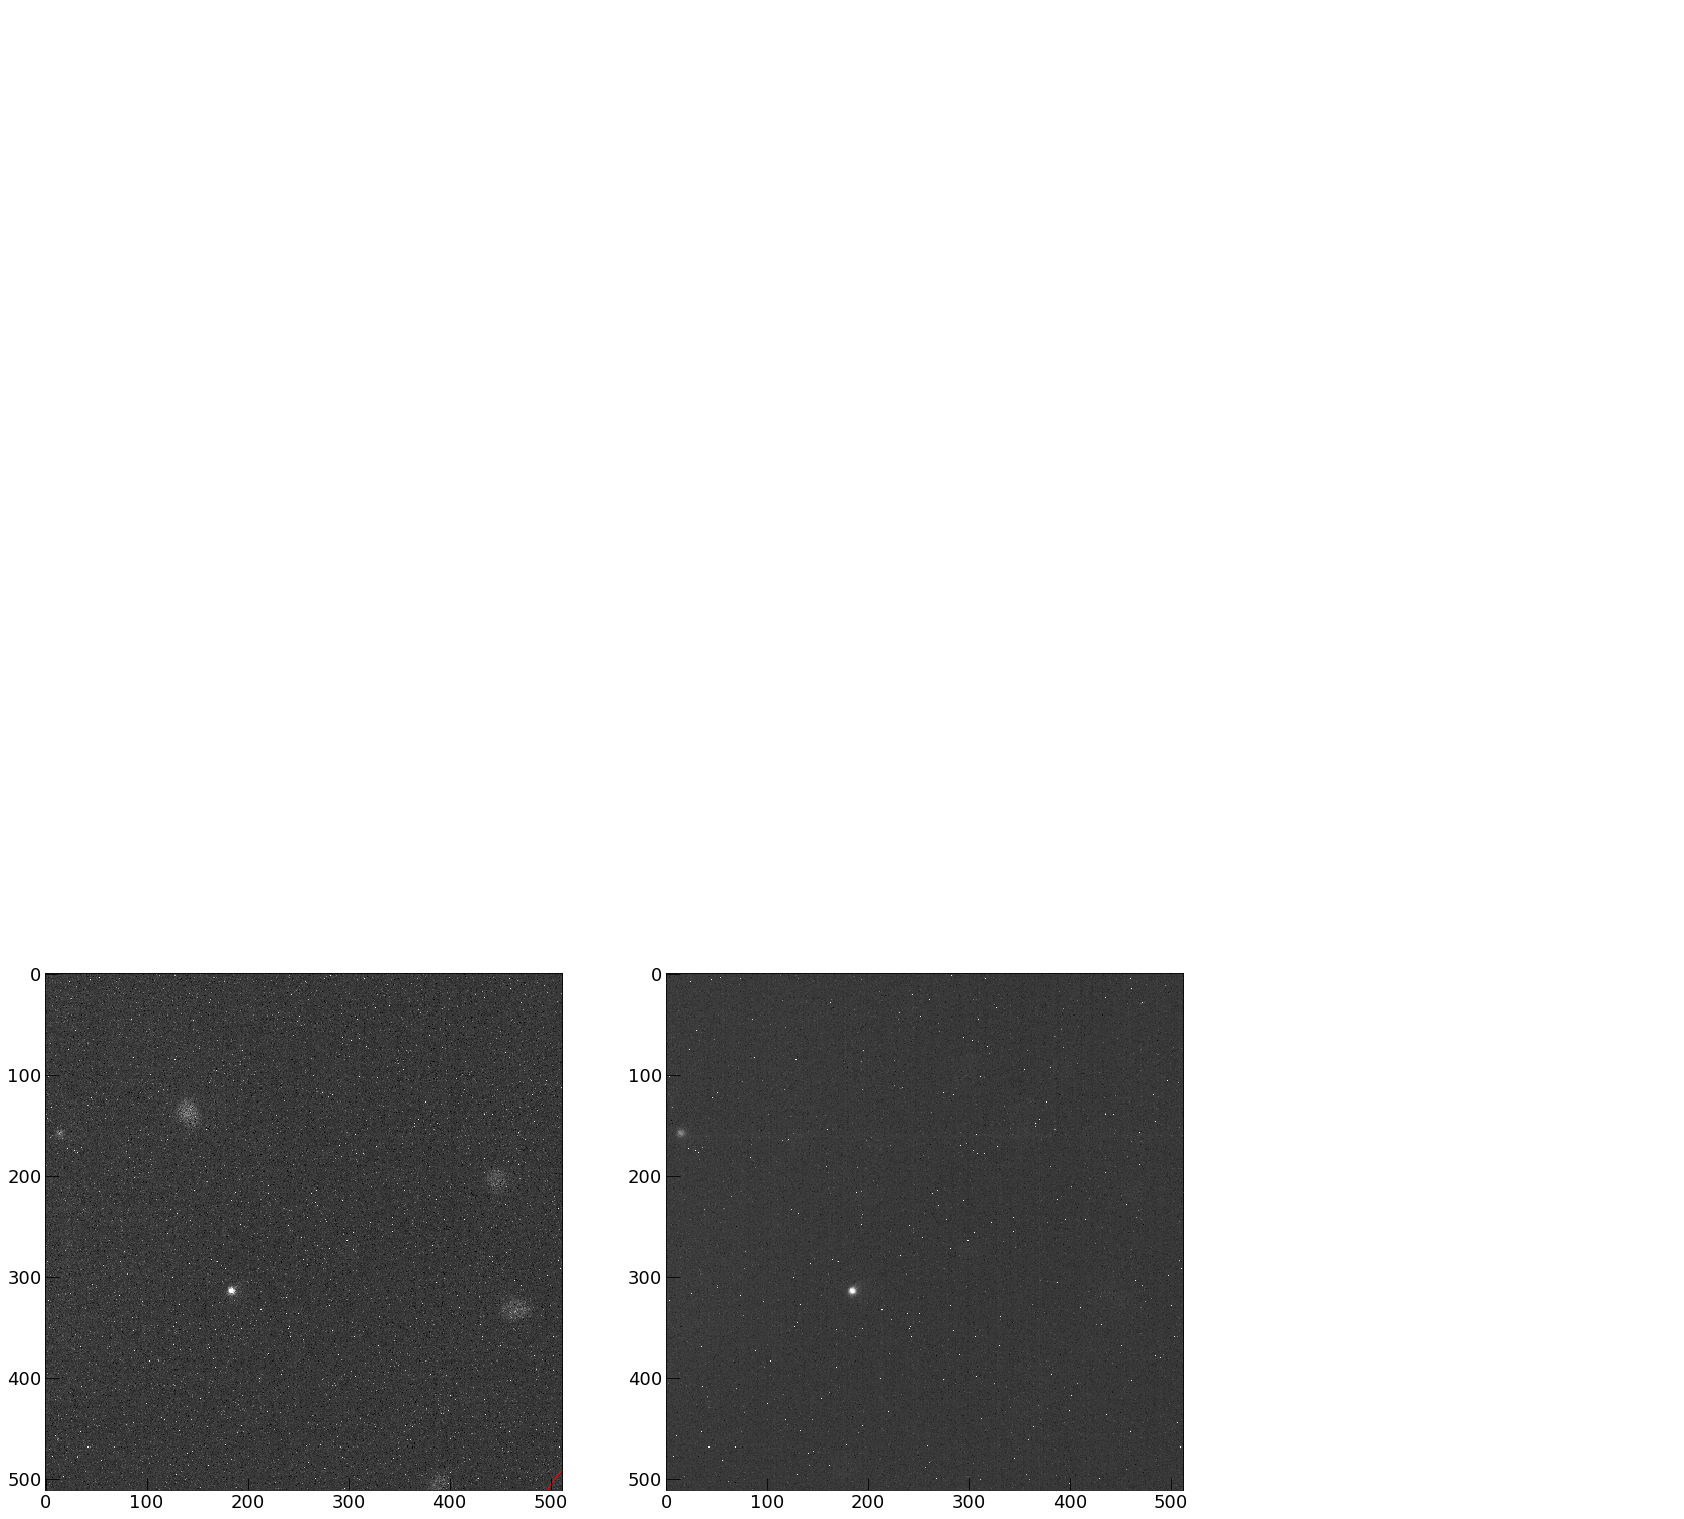

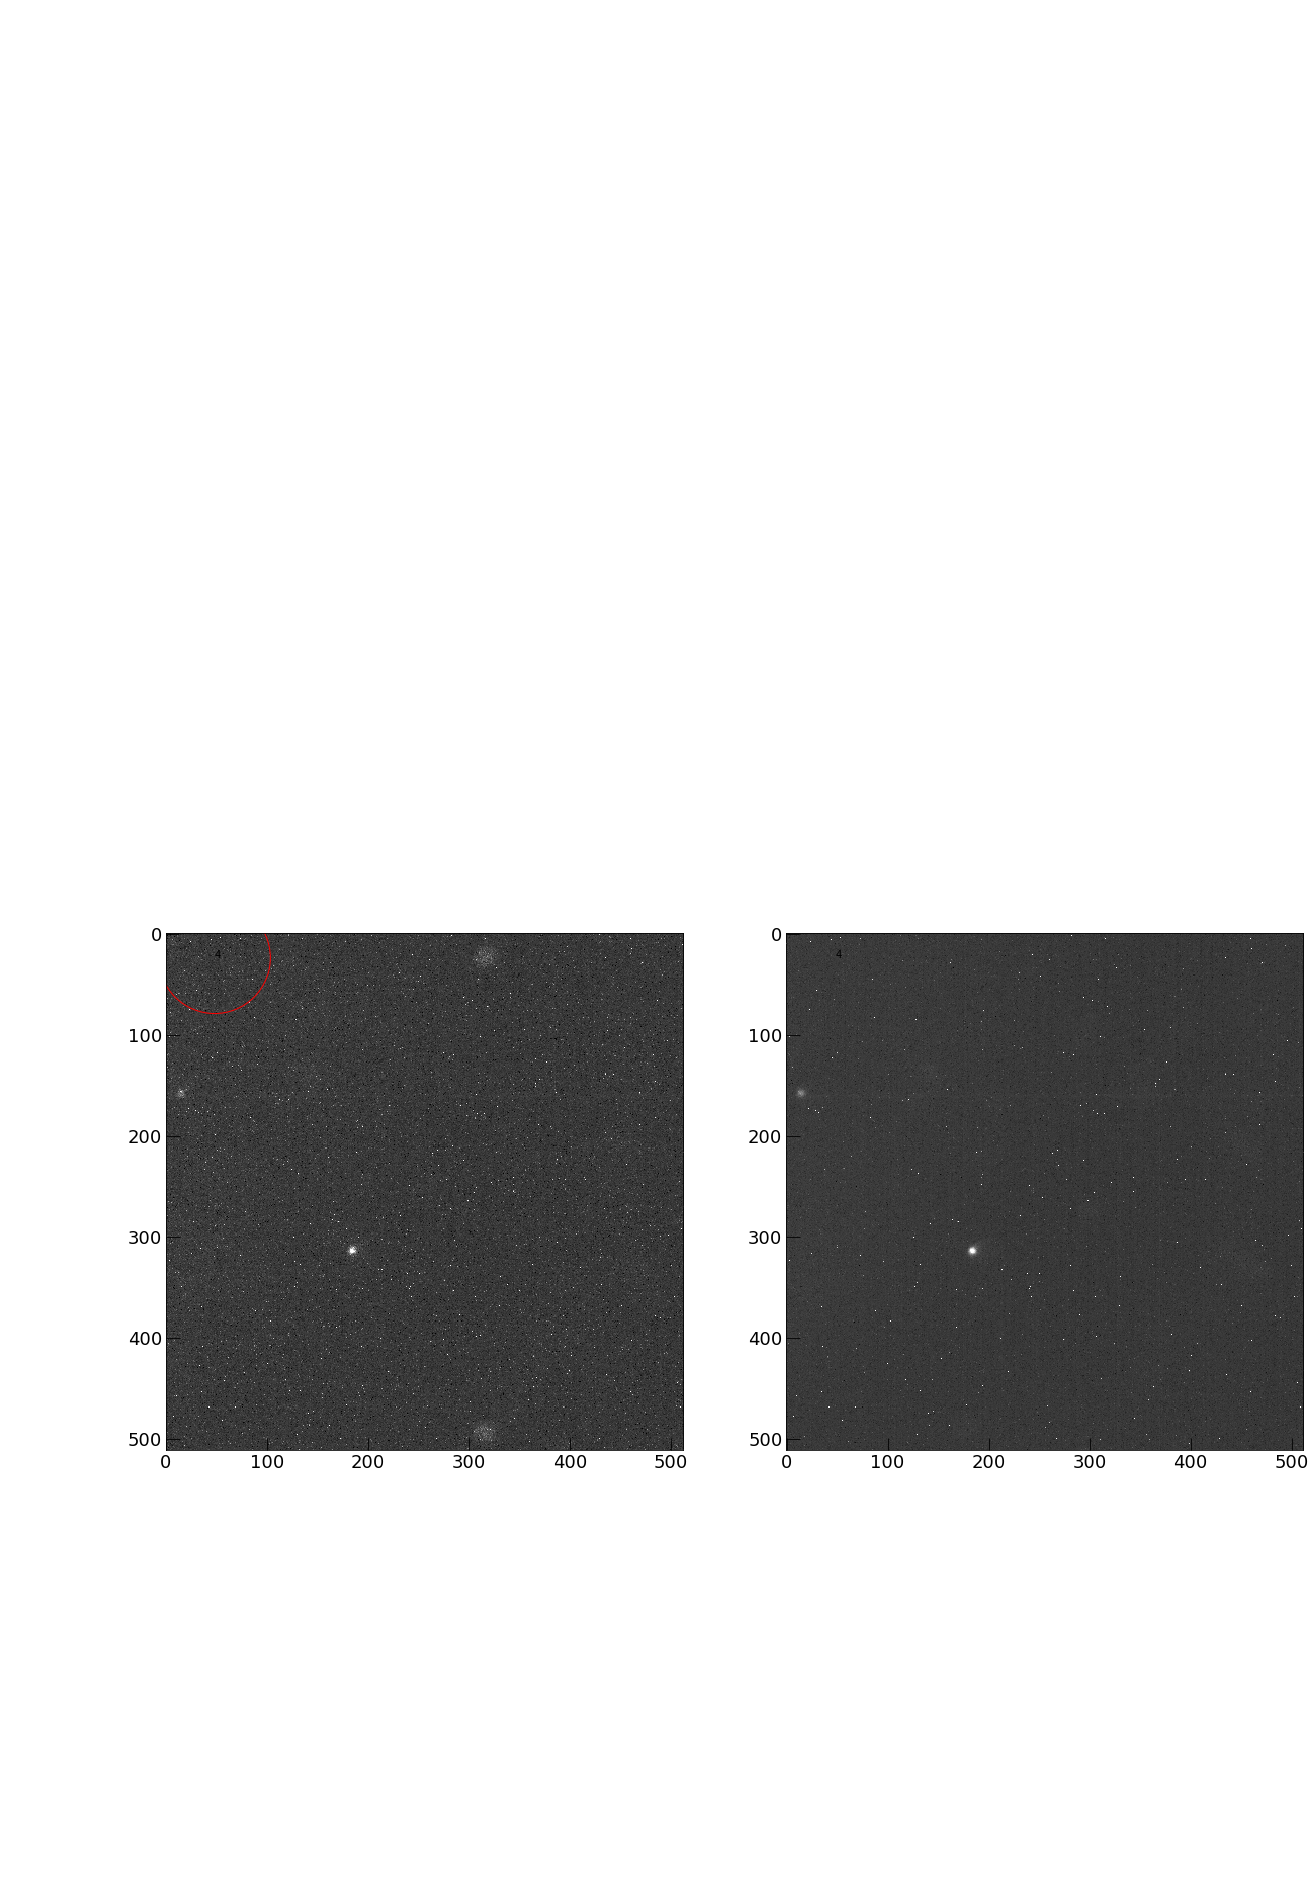

KeyboardInterrupt: 

In [160]:
my.set_atlas_style('large')
runI = 712
max_image=np.size([f for f in os.listdir(cy.file2FullPathCygnus(dataSelection, runI, 'H5')) if not f.startswith('.')])
print ("# of Image Files: %d" % (max_image))

debug = True
rescale = 256
# Usa la prima imagine cone BCK e non la usa per l'analisi
N = 10.0
img_save = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, 0)) 
scale=(img_save.shape[1]/rescale)
if N>1:
    for i in range(1, int(N)):
        dataImage = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, i))
        img_save = np.copy((dataImage+(N-1)*img_save)/N)

############
luceFe=[]
bad = False
# TAGLIO! ###############################
img_save  = img_save[862:1374, 1200:1712]
#########################################
for iTr in xrange(int(N), max_image): #max_image
    dataImage = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, iTr)) 

    # TAGLIO! ###############################
    dataImage = dataImage[862:1374, 1200:1712]
    #########################################
    imgRes = my.rebin(dataImage, (rescale, rescale))
    edges = (imgRes>101) & (imgRes<150) #soglia del contenuto dei pixel

    
    hough_radii = np.arange(3, 10, 0.1)
    hough_res = hough_circle(edges, hough_radii)
    
    accums, cxh, cyh, radii = hough_circle_peaks(hough_res, hough_radii, 
                                                 min_xdistance=5, 
                                                 min_ydistance=5,
                                                 total_num_peaks=80)

#    hough_radii = np.arange(1, 2.6, 0.1)
#    hough_res = hough_circle(edges, hough_radii)
#    accums_l, cxh_l, cyh_l, radii_l = hough_circle_peaks(hough_res, hough_radii,
#                                                         #min_xdistance=1, 
#                                                         #min_ydistance=1,
#                                                         total_num_peaks=50)
#    hough_radii = np.arange(3, 6, 0.1)
#    hough_res = hough_circle(edges, hough_radii)
#    accums_h, cxh_h, cyh_h, radii_h = hough_circle_peaks(hough_res, hough_radii,
#                                                         #min_xdistance=5, 
#                                                         #min_ydistance=5,
#                                                         total_num_peaks=50)
#
#    cxh = np.append(cxh_l, cxh_h)
#    cyh = np.append(cyh_l, cyh_h)
#    radii = np.append(radii_l, radii_h)
    
################ 

    imax  = np.argmax(radii)
    xg    = np.array([cxh[imax]])
    yg    = np.array([cyh[imax]])
    rg    = np.array([radii[imax]])
    cxh   = np.delete(cxh, imax)
    cyh   = np.delete(cyh, imax)
    radii = np.delete(radii, imax)
    
    dr    = 3.0
    ig    = 0
    while True:
        imax  = np.argmax(radii)
        idel  = np.array([])
        for k in xrange(0, rg.size):
            if ((cxh[imax]-xg[k])**2+(cyh[imax]-yg[k])**2) < (rg[k]+dr)**2:
                idel = np.append(idel,  imax)
        for j in xrange(0, np.size(idel)):
            cxh   = np.delete(cxh,   idel[j])
            cyh   = np.delete(cyh,   idel[j])
            radii = np.delete(radii, idel[j]) 
        if np.size(idel) == 0:
                xg    = np.append(xg,   cxh[imax])
                yg    = np.append(yg,   cyh[imax])
                rg    = np.append(rg,   radii[imax])
        if radii.size==0:
            break
#    dataImage = my.read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI, iTr)) 
#    imgRes = my.rebin(dataImage, (rescale, rescale))
#    edges = (imgRes>100) & (imgRes<150) #soglia del contenuto dei pixel
#    
#    hough_radii = np.arange(1, 4,0.1)
#    hough_res = hough_circle(edges, hough_radii)
#    accums, cxh, cyh, radii = hough_circle_peaks(hough_res, hough_radii,
#                                               total_num_peaks=40)
#    xg    = np.array([cxh[0]])
#    yg    = np.array([cyh[0]])
#    rg    = np.array([radii[0]])
#    dr    = 3.0
#    ig    = 0
#    while True:
#        i = 0
#        while True:
#            if ((cxh[i]-xg[ig])**2+(cyh[i]-yg[ig])**2) < (rg[ig]+dr)**2:
#                cxh   = np.delete(cxh, i)
#                cyh   = np.delete(cyh, i)
#                radii = np.delete(radii, i)
#            i += 1
#            if i >= cxh.size:
#                break
#        if  cxh.size < rg.size:
#            break
#        ig   += 1
#        xg    = np.append(xg, cxh[0])
#        yg    = np.append(yg, cyh[0])
#        rg    = np.append(rg, radii[0])
#    xg    = np.delete(xg, xg.size-1)
#    yg    = np.delete(yg, yg.size-1)
#    rg    = np.delete(rg, rg.size-1)
    if debug: 
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(dataImage, cmap="gray", vmin=85,vmax=150)
        ax[1].imshow(img_save, cmap="gray", vmin=85,vmax=150)
        for j in xrange(0, rg.size):
            axa = plt.Circle((xg[j]*scale, yg[j]*scale), (rg[j]+dr)*scale, color='r', fill=False)
            ax[0].add_artist(axa)
            ax[0].annotate(j, (xg[j]*scale,yg[j]*scale))
            ax[1].annotate(j, (xg[j]*scale,yg[j]*scale))

        plt.show()
    if iTr/10.0 == int(iTr/10.0):
        print ('Traccia: %d, spot %d %.4f %.4f' % (iTr, rg.size,  dataImage.mean(), img_save.mean()))
        # print rg*scale
        # print xg*scale
        # print yg*scale
    for j in xrange(0, rg.size):
        imgG = np.copy(dataImage[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                                 int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)])
        imgB = np.copy(img_save[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                                int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)])
        imgC = imgG - imgB

        if imgC.sum()>40000:
            print ('>>> %d, luce: %.2f, bck %.2f, diff: %.2f %.2f %.2f' % 
                   (iTr, imgG.sum(), imgB.sum(), imgC.sum(), dataImage.sum(), rg[j]*scale))
            bad = True
        else:
            luceFe.append([iTr, j, rg.size, rg[j]*scale, 
                           imgG.mean(), imgG.sum(), imgG.std(), 
                           imgB.mean(), imgB.sum(), imgB.std(), 
                           imgC.mean(), imgC.sum(), imgC.std(), xg[j]*scale, yg[j]*scale])
        if imgC.sum()<-1000:
            print ('<<<< %d, %d, %d, %.1f, luce: %.2f, bck %.2f, diff: %.2f %.2f' % 
                   (iTr, j, rg.size, rg[j]*scale, imgG.sum(), imgB.sum(), imgC.sum(), dataImage.sum()))
            if debug :
                print ('%d, %d, %d, %.1f, luce: %.2f, bck %.2f, diff: %.2f %.2f' % 
                       (iTr, j, rg.size, rg[j]*scale, imgG.sum(), imgB.sum(), imgC.sum(), dataImage.sum()))
                dd = np.copy(dataImage)
                bb = np.copy(img_save)
                dd = dd[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                   int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)]
                bb = bb[int((yg[j]-rg[j]-dr)*scale):int((yg[j]+rg[j]+dr)*scale), 
                   int((xg[j]-rg[j]-dr)*scale):int((xg[j]+rg[j]+dr)*scale)]
                fig, ax = plt.subplots(1,2)
                ax[0].imshow(dd,cmap="gray",  vmin=100,vmax=150)
    #            axa = plt.Circle((0, 0), (rg[j]+dr)*scale, color='r', fill=False)
    #            ax[0].add_artist(axa)
                ax[1].imshow(bb,cmap="gray",  vmin=100,vmax=150)
    #            axb = plt.Circle((0, 0), (rg[j]+dr)*scale, color='r', fill=False)
    #            ax[1].add_artist(axb)
    
                plt.show()
            
    if not bad:
        
        img_save = np.copy((dataImage+(N-1)*img_save)/N)
        bad = False
print ("ENDED")
luceFe=np.array(luceFe)

In [154]:
np.savetxt(("./data/fe_cut_101_150_1-10_0.1_scale4_%d_50_1024.txt" % runI), 
           luceFe, fmt='%.12e', delimiter=" ")

In [155]:
# ricarica un determinato file 

#runL = 323
#luceFe = np.loadtxt(("./data/fe_cut_101_150_1-10_0.1_scale4_%d_50_1024.txt" % runL), 
#                    delimiter=" ")

In [156]:
# Zappa le righe della tabella con valori insani trovati nella colonna 4...
val = np.isnan(luceFe[:,4])
print ("trovate %d righe insane" % val.sum())
i=0
if val.sum():
    while True:
        if val[i]:
            print ("%d-->" % (i), luceFe[i,:])
            luceFe=np.delete(luceFe, i, 0)
            val = np.isnan(luceFe[:,4])
            if not val.sum():
                break
        i+=1

trovate 488 righe insane
('0-->', array([   10. ,     0. ,    12. ,    39.2,     nan,     0. ,     nan,
           nan,     0. ,     nan,     nan,     0. ,     nan,   752. ,
        1248. ]))
('1-->', array([  10. ,    2. ,   12. ,   39.2,    nan,    0. ,    nan,    nan,
          0. ,    nan,    nan,    0. ,    nan,   80. ,  640. ]))
('2-->', array([  10. ,    4. ,   12. ,   31.2,    nan,    0. ,    nan,    nan,
          0. ,    nan,    nan,    0. ,    nan,  152. ,  616. ]))
('4-->', array([  10. ,    7. ,   12. ,   31.2,    nan,    0. ,    nan,    nan,
          0. ,    nan,    nan,    0. ,    nan,   40. ,  880. ]))
('5-->', array([   10. ,     9. ,    12. ,    27.2,     nan,     0. ,     nan,
           nan,     0. ,     nan,     nan,     0. ,     nan,    72. ,
        1088. ]))
('6-->', array([   10. ,    11. ,    12. ,    27.2,     nan,     0. ,     nan,
           nan,     0. ,     nan,     nan,     0. ,     nan,   144. ,
        1224. ]))
('7-->', array([  11. ,    1. ,    4. ,

IndexError: index 277 is out of bounds for axis 0 with size 276

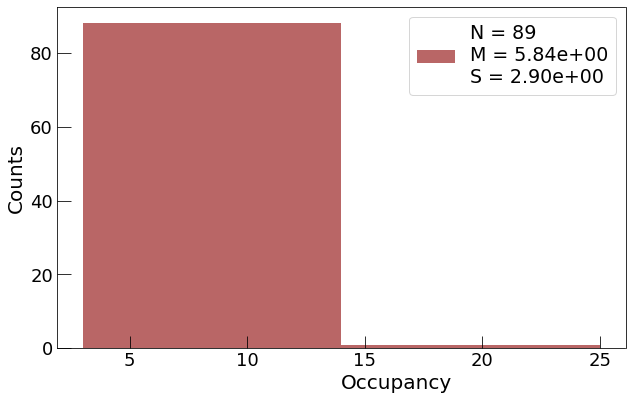

In [157]:
my.set_atlas_style()
primo = luceFe[0,0]
occupancy = np.array([])
for i in range(1, luceFe[:,0].size):

    if luceFe[i,0] != primo:
        occupancy = np.append(occupancy, luceFe[i,2] )
    primo = luceFe[i,0]
y = occupancy
#y = y[(y>-1000) & (y<15000)]
bins = y.size/30
plt.hist(y, bins=bins, color='darkred', alpha=0.6,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.xlabel(r'Occupancy', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.legend()
plt.show()

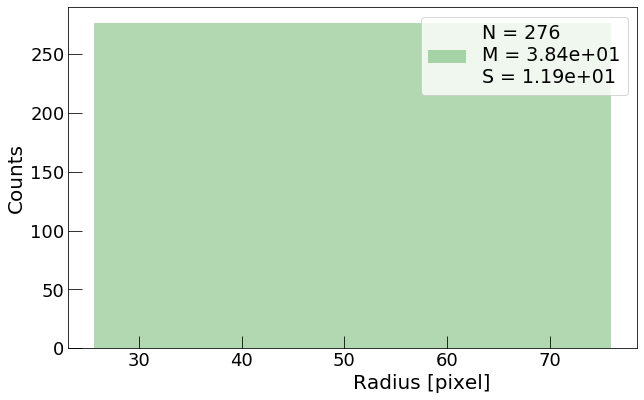

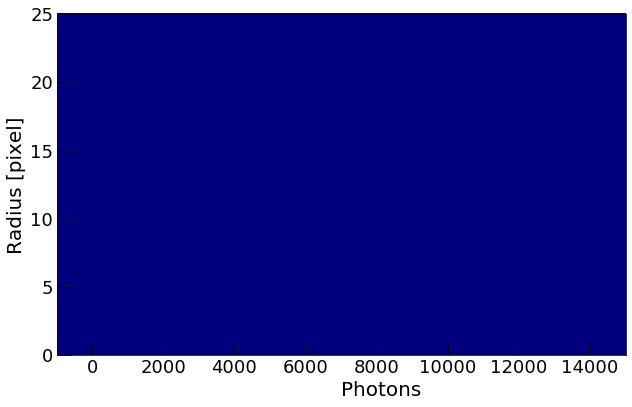

In [158]:
my.set_atlas_style()
y       = luceFe[:,3]  # distribuzione dei raggi
x       = luceFe[:,11] # distribuzione della luce
bins = y.size/150
plt.hist(y, bins=bins, color='green', alpha=0.3,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.xlabel(r'Radius [pixel]', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.legend()
plt.show()
plt.hist2d(x, y, bins=(bins, bins), cmap=plt.cm.jet, range=((-1000,15000),(0,25)))
#plt.plot(x,y, 'k.')
#plt.plot(x[y<6],y[y<6], 'r.')
plt.xlim((-1000,15000))
plt.xlabel(r'Photons', horizontalalignment = 'left')
plt.ylabel(r'Radius [pixel]')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide


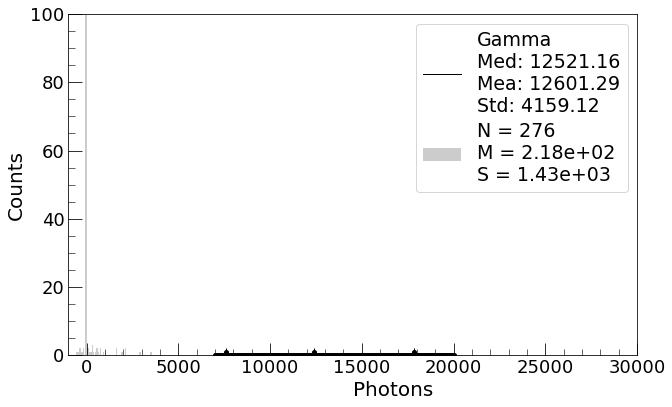

In [159]:
my.set_atlas_style()
mysize = 0
y       = luceFe[:,11]
#y = y[(y>80) & (y<120)]     # mean sig (var 2)
#y = y[(y>0) & (y<400000)]  # sum sig (var 3)
#y = y[(y<20000)]    # mean sig - bck (var 5)

fit = True
gauss = False
polya = True
bins = y.size
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
#plt.xlim((0, 300))
if fit:
    cmin    = 7000.0
    cmax    = 20000.0
    
    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
    plt.errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()
    if gauss:
        popt, pcov = curve_fit(my.Gauss3, x, yh, 
                              sigma=ye,
                              absolute_sigma=True,
                              p0=(A, M, S))
        xf = np.linspace(cmin, cmax, 100)
        plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
                      (popt[0], popt[1], popt[2]))
    if polya:
        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'k-', 
                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))


#plt.yscale('log')
plt.xlim((-1000, 30000))
plt.ylim((0, 100))
plt.xlabel(r'Photons', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.minorticks_on()
plt.legend()
plt.show()

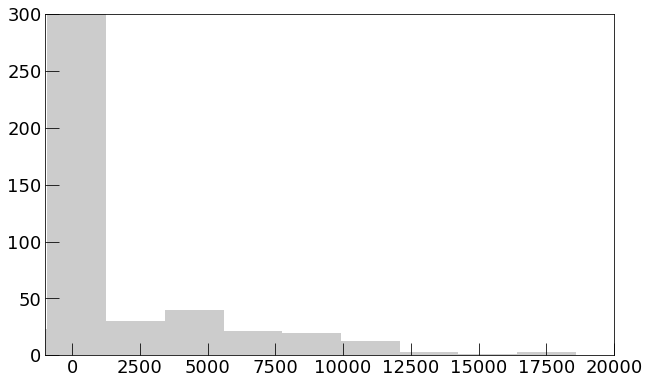

In [152]:
my.set_atlas_style()
mysize = 0
y       = luceFe[:,5]-luceFe[:,8]
bins = y.size/40
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.xlim((-1000, 20000))
plt.ylim((0, 300))
plt.show()

P0 = 8.40e-04 ± 1.35e-04
P1 = 3.71e-02 ± 3.80e-04


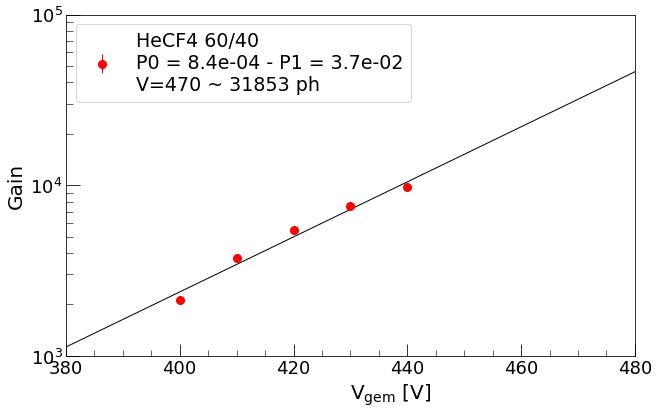

In [501]:
g = np.array([9764, 7568, 5485, 3742, 2136])
s = np.array([2526, 1914, 1342, 938, 576])
n = np.array([7547, 6715, 5917, 5262, 5173])
v = np.array([440, 430, 420, 410, 400])
yerr = g/np.sqrt(n)
p0, p1 = 0.0008, 0.03
popt, pcov = curve_fit(my.ExpGain, v, g, 
                       sigma=yerr,
                       absolute_sigma=True,
                       p0=(p0, p1))
perr = np.sqrt(np.diag(pcov))
for i in range(0, len(popt)):
    print ("P%d = %.2e ± %.2e" % (i, popt[i], perr[i]))
plt.errorbar(v, g, yerr, fmt="ro", label=('HeCF4 60/40\nP0 = %.1e - P1 = %.1e\nV=470 ~ %.0f ph' % 
                                          (popt[0], popt[1],my.ExpGain(470.0, *popt))))
#plt.plot(v, g, 'ro', label=('HeCf4 60/40\n@ V=470 => %.0f ph' % my.ExpGain(470.0, *popt)))
x = linspace(380, 480, 100)
plt.plot(x, my.ExpGain(x, *popt), 'k-')

plt.xlim((380, 480))
plt.ylim((1e3, 1e5))
plt.yscale("log")
plt.legend(loc=2)
plt.minorticks_on()
plt.xlabel(r'V$_{gem}$ [V]', horizontalalignment = 'left')
plt.ylabel('Gain')
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


116.417910448
3.30258200902 3873.9641637 839.871627963
7142.0 3956.0 29901030.3594 0.553906468776 214260.0


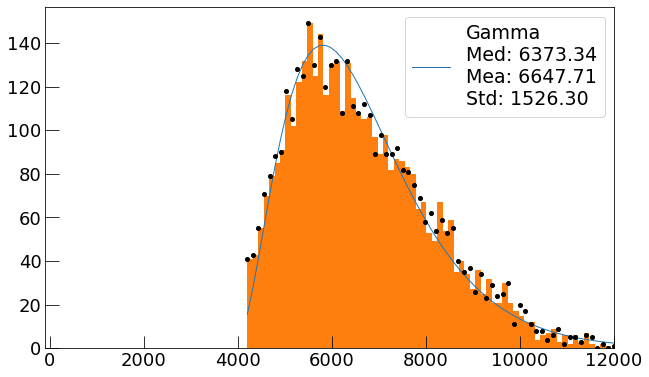

In [299]:
y        = luceFe[:,11]
cmin     = 4200.0
cmax     = 12000.0
bin_size = 30
bins     = int(y.size/bin_size)
yt, _    = np.histogram(y, bins)
binf     = int(bins*(cmax-cmin)/(y.max()-y.min()))
x        = np.array(np.linspace(cmin, cmax, binf))
yh, bins_edge    = np.histogram(y, binf, range=(cmin,cmax))
ye       = 1/np.sqrt(yh)
sum_yh   = float(sum(yh))
sum_yt   = float(sum(yt))
sum_y    = float(sum(y))

print np.diff(bins_edge)[0]

# exactly same as above
alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
print alpha_gamma, loc_gamma, scale_gamma
print sum_yt, sum_yh, sum_y, sum_yh/sum_yt, float(sum_yt*bin_size)

plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 
         label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))

plt.hist(y[(y>cmin) & (y<cmax)], bins=binf)

plt.errorbar(x, yh, ye, fmt="k.")
plt.xlim(-100, 12000)
plt.legend()
plt.show()

In [5]:
 luceFe[:,11]

NameError: name 'luceFe' is not defined

a: 3.30, loc: 3873.96, scale: 839.87, median: 6373.34, mean: 6647.71, std: 1526.30


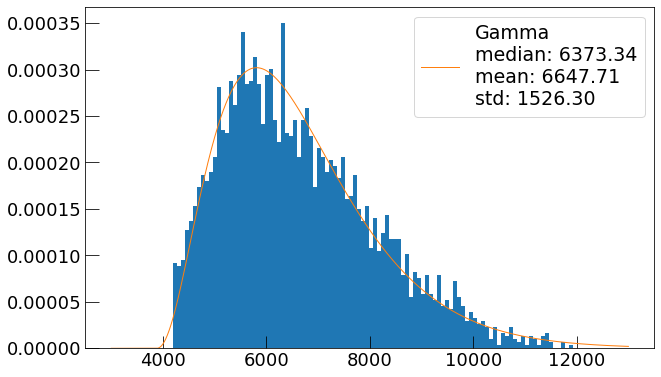

In [203]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = y[(y>cmin) & (y<cmax)]

# plot normed histogram
plt.hist(ser, normed=True, bins=binf)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
#m, s = stats.norm.fit(ser) # get mean and standard deviation  
#pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
#plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
print ("a: %.2f, loc: %.2f, scale: %.2f, median: %.2f, mean: %.2f, std: %.2f" % 
       (ag, bg, cg,stats.gamma.median(ag, bg,cg),  stats.gamma.mean(ag, bg,cg) , stats.gamma.std(ag, bg,cg)))
plt.plot(lnspc, pdf_gamma, label=("Gamma\nmedian: %.2f\nmean: %.2f\nstd: %.2f"
                                  %(stats.gamma.median(ag, bg,cg),  
                                    stats.gamma.mean(ag, bg,cg) , 
                                    stats.gamma.std(ag, bg,cg))))

# guess what :) 
#ab,bb,cb,db = stats.beta.fit(ser)  
#pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
#plt.plot(lnspc, pdf_beta, label="Beta")
plt.legend()
plt.show()  


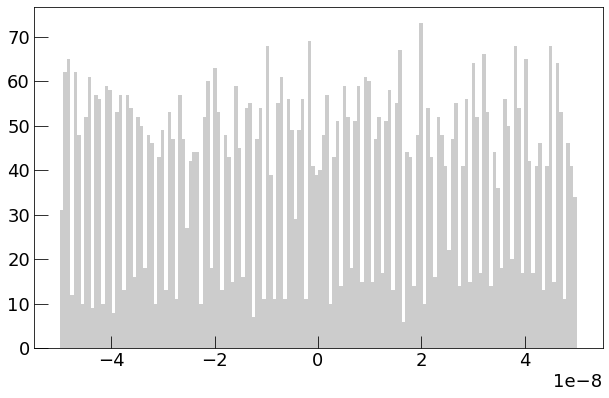

In [625]:
my.set_atlas_style()
mysize = 0
y       = luceFe[:,11]-(luceFe[:,5]-luceFe[:,8])
#y = y[(y>80) & (y<120)]     # mean sig (var 2)
#y = y[(y>0) & (y<400000)]  # sum sig (var 3)
#y = y[(y<20000)]    # mean sig - bck (var 5)

fit = True
gauss = False
polya = True
bins = y.size/40
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.show()

In [ ]:
y = dataImage.ravel()
bins = y.size/100
plt.hist(y, bins=bins, color='red', alpha=0.6,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.xlim(80, 140)

plt.legend()
plt.show()

In [ ]:
xcut   =  3000
xRangeL =  200
xRangeR =  250
intSco = []
intSco2 = []
minSco = []
alow   = []
ahight = []
smoothP = 200
run = 411
for iTr in xrange(0, 500):
    t, apmt  = cy.ReadScopeTrace(cy.scopeFile2FullPathCygnus(dataSelection, run, iTr, 1))
    pmt = my.smooth(apmt,smoothP)
    yi = min(pmt[xcut:])
    yp = min(pmt[:xcut])
    xi = np.argmin(pmt[xcut:])+xcut
    intVal = apmt[xi-xRangeL:xi+xRangeR].sum()
    intVal2 = np.trapz(apmt[xi-xRangeL:xi+xRangeR])
    minSco.append([apmt[xi]])
    intSco.append([intVal])
    intSco2.append([intVal2])
    if -0.15 < apmt[xi] < -0.1:
        alow.append([t, pmt])
    if -1.4 < apmt[xi] < -1.0:
        ahight.append([t, pmt])
intSco=np.array(intSco)
intSco2=np.array(intSco2)
minSco=np.array(minSco)
alow=np.array(alow)
ahight=np.array(ahight)

In [ ]:
alow[0][1]

In [ ]:
for i in xrange(0, len(ahight)):
    plt.plot(alow[i][0], alow[i][1], 'b-', alpha=0.7)
plt.vlines(alow[i][0][xi], -.15, 0.01, 'r')
plt.vlines(alow[i][0][xi-xRangeL], -.15, 0.01, 'g')
plt.vlines(alow[i][0][xi+xRangeR], -.15, 0.01, 'g')
plt.title('PMT -0.15 < A < -0.1')
plt.show()
for i in xrange(0, len(ahight)):
    plt.plot(ahight[i][0], ahight[i][1], 'r-', alpha=0.7)
plt.vlines(ahight[i][0][xi], -1.4, 0.01, 'r')
plt.vlines(ahight[i][0][xi-xRangeL], -1.4, 0.01, 'g')
plt.vlines(ahight[i][0][xi+xRangeR], -1.4, 0.01, 'g')
plt.title('PMT -1.4 < A < -1.0')
plt.show()
for i in xrange(0, len(ahight)):
    plt.plot(ahight[i][0], ahight[i][1], 'r-', alpha=0.7)
plt.vlines(ahight[i][0][xi], -1.4, 0.01, 'r')
plt.vlines(ahight[i][0][xi-xRangeL], -1.4, 0.01, 'g')
plt.vlines(ahight[i][0][xi+xRangeR], -1.4, 0.01, 'g')
plt.ylim(-.15,0.01)
plt.title('PMT -1.4 < A < -1.0')
plt.show()

In [ ]:
plt.plot(-minSco, -intSco, 'k.', label='')
#plt.plot(-minSco, -intSco2, 'r.')
plt.xlabel('Amplitude V')
plt.ylabel('Charge V*s')
#plt.xlim((0,0.2))
#plt.ylim((0,50))
plt.legend()
plt.show()

In [ ]:
plt.hist(-(minSco), bins=200, color='red', alpha=0.6) 
plt.show()